In [1]:
import torch

X = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
limit = int(input())

larger_than_limit_sum = X[X>limit].sum()

print(larger_than_limit_sum)

tensor(0)


In [7]:
x = torch.tensor([[1,2],[4,5]], requires_grad=True, dtype=float)
z = 10*torch.log((x+1)).sum()
z.backward()
print(x-x.grad)

tensor([[-4.0000, -1.3333],
        [ 2.0000,  3.3333]], dtype=torch.float64, grad_fn=<SubBackward0>)


In [13]:
w = torch.tensor([
    [5.0,10.0],
    [1.0,2.0]
], requires_grad=True, device="cuda")

function = (torch.log(torch.log(w+7))).prod() 
function.backward()

print(w.grad)

tensor([[0.0201, 0.0109],
        [0.0449, 0.0351]], device='cuda:0')


In [15]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True, device="cuda")
alpha = 0.001

for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    w.data -=  alpha * w.grad
    w.grad.zero_()
    # something is missing here!

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], device='cuda:0', requires_grad=True)


In [16]:
w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True, device="cuda")
alpha = 0.001
optimizer = torch.optim.SGD([w], lr=alpha) # put our code here. Do not forget [] inside SGD constructor !!!!

for _ in range(500):
    # it's critical to calculate function inside the loop:
    function = (w + 7).log().log().prod()
    function.backward()
    optimizer.step()
    optimizer.zero_grad()
    # something is missing here!

print(w)

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], device='cuda:0', requires_grad=True)


Object `plt.show()` not found.
0.25


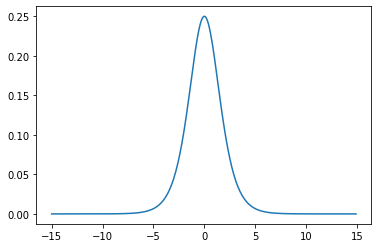

In [18]:
from math import exp
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-15,15,0.1)


def func(x):
    return (1/(1+exp(-x))) * (1 - (1/(1+exp(-x))))


y = [func(i) for i in x]
plt.plot(x, y)
?plt.show()
print(max(y))